## Angewandtes Quantencomputing Laborpraktikum WiSe 25/26

### Praktikum 2: Quantenschaltkreise mit Qiskit (17.10.2025)

### Einführung Quantenschaltkreise in Qiskit 
In diesem Praktikum wenden wir dieses Wissen an, um mit Qiskit Quantenschaltkreise zu erstellen, auszuführen und deren Ergebnisse zu interpretieren.

Qiskit ist ein Open Source Framework von IBM zur Programmierung und Simulation von Quantencomputern.
Es ermöglicht das Erstellen, Visualisieren und Ausführen von Quantenschaltkreisen sowohl auf simulierten als auch auf echten Quantenprozessoren.

Qiskit kann installiert werden mit 
```
pip install qiskit
```

Wir benutzen Qiskit, um Quantenschaltkreise zu erzeugen. Dazu erzeugen wir zunächst einen leeren Schaltkreis mit Qiskit.
Dies funktioniert mit der ``QuantumCircuit`` Klasse in Qiskit.
Als Argument bei der Initialisierung übergeben wir die Anzahl der Qubits. Für diese Praktikumseinheit bleiben wir bei einem Qubit.
Der Schaltkreis wird also initialisiert mit ``QuantumCircuit(1)``

In [283]:
import numpy as np
from qiskit import QuantumCircuit

# Die 1 als Argument gibt die 
num_qubits = 1
quantum_circuit = QuantumCircuit(num_qubits)

Wir können jederzeit eine grafische Ausgabe des Quantenschaltkreises mit ``quantum_circuit.draw('mpl')`` generieren.

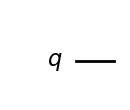

In [284]:
# Ausgabe unseres leeren Schaltkreises
quantum_circuit.draw('mpl')

Quantengatter werden durch den Aufruf von Klassenfunktionen an den Schaltkreis angehängt, wobei das zugehörige Qubit als Argument angegeben werden muss:
```python
# Fügt ein X Gate zu Qubit 1 hinzu (Python-Indizierung 0 -> Qubit 1)
quantum_circuit.x(0)
```
Folgende Gatter kennen wir bereits:

- X-Gatter: ``QuantumCircuit.x(0)``
- Y-Gatter: ``QuantumCircuit.y(0)``
- Z-Gatter: ``QuantumCircuit.z(0)``
- Hadamard-Gatter: ``QuantumCircuit.h(0)``

Es gibt noch weitere Gatter, die wir im Quantencomputing brauchen:

- S-Gatter: ``QuantumCircuit.s(0)``
- T-Gatter: ``QuantumCircuit.t(0)``

Außerdem können wir auch Rotationsgatter definieren, diese benötigen neben dem Qubit noch einen Winkel, der als erstes Argument gegeben wird.
Der Winkel wird in Radiant gegeben (0 bis $2\pi$). 

- Rx-Gatter: ``QuantumCircuit.rx(theta, 0)``
- Ry-Gatter: ``QuantumCircuit.ry(theta, 0)``
- Rz-Gatter: ``QuantumCircuit.rz(theta, 0)``

Von Grad in Radiant kann mittels folgender Formel umgerechnet werden: $ \theta_\text{Radiant} = \theta_{Grad} \cdot \frac{\pi}{180}$

**Mehrere Gatter**

Sollen mehrere Quantengatter hintereinander angehängt werden, dann werden die Gatter-Funktionen einfach hintereinander aufgerufen.

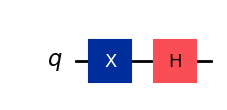

In [285]:
# Beispiel: Quantenschaltkreis mit einem X- und einem Hadamard-Gatter:
quantum_circuit = QuantumCircuit(1)
quantum_circuit.x(0)
quantum_circuit.h(0)
quantum_circuit.draw('mpl')

## Aufgabe 1: Quantenschaltkreise bauen

Als kleine Fingerübung am Anfang: Konstruieren Sie die folgenden Quantenschaltkreise und geben Sie mittels der ``draw`` Funktion aus:

**Aufgabe 1.1:** Schaltkreis mit einem Z-Gatter

In [286]:
# TODO

**Aufgabe 1.2:** Schaltkreis mit einem X-Gatter gefolgt von einem H-Gatter

In [287]:
# TODO

**Aufgabe 1.3:** Schaltkreis mit einem Ry-Gatter und einem Winkel von $\theta=\pi$. ($\pi$ kann in Python durch ``np.pi`` genutzt werden.)

In [288]:
# TODO

**Aufgabe 1.4:** Schaltkreis mit einem Rx-Gatter und einem Winkel von 45 Grad gefolgt von einem T-Gatter und einem H-Gatter

In [289]:
# TODO

## Berechnen von Zustandsvektoren und Quantenzuständen aus den Quantenschaltkreisen



Qiskit kann aus den Quantenschaltkreisen den resultierenden Quantenzustand berechnen. 
Erinnerung: Der Quantenzustand eines Qubits kann mit zwei Notationen geschrieben werden ($\alpha, \beta$: komplexe Zahlen)

- Zustandsvektor: $\ket{\Psi} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$
- Quantenzustand: $\ket{\Psi} = \alpha \ket{0} + \beta \ket{1}$

Um beide Ausdrücke aus einem gegebenen Quantenschaltkreis zu bestimmen, benutzen wir folgende Funktionen aus der Hilfsbibliothek ``qc_lecture_tools``:

- ``sv_vector(quantum_circuit, label = None)``: gibt den resultierenden **Zustandsvektor** eines Quantenschaltkreise aus
- ``sv_state(quantum_circuit, label = None)``: gibt den resultierenden **Quantenzustand** eines Quantenschaltkreises aus
- ``sv_probs(quantum_circuit, label = None)``: gibt die resultierenden **Wahrscheinlichkeiten** einen Basiszustand zu Messen nach Anwendung des Quantenschaltkreises aus

Alle Funktionen haben als zweites optionales Argument die Möglichkeit, eine Beschreibung hinzuzufügen. Die Darstellungen können jederzeit mit ``display()``.

In [290]:
from qc_lecture_tools.statevector import sv_vector, sv_state, sv_probs # Import von Hilfsfunktionen

# Beispiel: Hadamard-Gatter
quantum_circuit = QuantumCircuit(1)
quantum_circuit.h(0)

# Ausgabe des Zustandsvektors, des Quantenzustands, und der Messwahrscheinlichkeiten (kann einfach kopiert werden)
display(sv_vector(quantum_circuit, "Zustandsvektor: "))
display(sv_state(quantum_circuit, "Quantenzustand: "))
display(sv_probs(quantum_circuit, "Messwahrscheinlichkeiten:"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Messwahrscheinlichkeiten:


<IPython.core.display.Math object>

In [291]:
# der 0-Zustand ist per Definition der Zustand, mit dem der Quantenschaltkreis initialisiert wird:
quantum_circuit = QuantumCircuit(1)
print("0-Zustand:")
display(sv_vector(quantum_circuit, "Zustandsvektor: "))
display(sv_state(quantum_circuit, "Quantenzustand: "))
display(sv_probs(quantum_circuit, "Messwahrscheinlichkeiten:"))

# der 1-Zustand können wir mit dem X-Gatter erzeugen:
quantum_circuit = QuantumCircuit(1)
quantum_circuit.x(0)
print("1-Zustand:")
display(sv_vector(quantum_circuit, "Zustandsvektor: "))
display(sv_state(quantum_circuit, "Quantenzustand: "))
display(sv_probs(quantum_circuit, "Messwahrscheinlichkeiten:"))

0-Zustand:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Messwahrscheinlichkeiten:


<IPython.core.display.Math object>

1-Zustand:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Messwahrscheinlichkeiten:


<IPython.core.display.Math object>

## Aufgabe 2: Das S- und T-Gatter

Untersuchen Sie mit den gegebenen Funktionen die Wirkung des S- und T-Gatters auf die Basiszustände $\ket{0}$ und $\ket{1}$.
Überlegen Sie sich, wie die Matrix der beiden Gatter aussehen könnte, indem sie die Zustandsvektoren zu einer Matrix formen. 
(Kopieren Sie dazu den Code aus der vorherigen Zelle und fügen Sie manuell das S- oder das T-Gatter hinzu)


**Aufgabe 2.1:** Analyse des S-Gatters.

In [292]:
# TODO

**Aufgabe 2.2:** Analyse des T-Gatters.

In [293]:
# TODO

Der komplexe Ausdruck kann in die Polardarstellung umgeformt werden als $\frac{\sqrt{2}(1+i)}{2}=e^{i\pi/4}$.

## Aufgabe 3: Mehrere Gatter

Als nächstes analysieren wir, wie sich mehrere Gatter hintereinander auswirken, und wie wir damit die Wahrscheinlichkeiten der Zustände steuern können.


**Aufgabe 3.1:** Analysieren Sie, wie es sich auswirkt, wenn wir jeweils zwei folgenden Gatter hintereinander ausführen $H$, $X$, $Y$, $Z$ (z.B. $HH$). Analysieren Sie die Wirkung entweder auf die zwei Basiszustände oder alternativ auf den 50/50 Superpositionszustand aus dem Hadamard-Gatter (``.h()``).

In [294]:
# TODO

**Aufgabe 3.2:** Was passiert, wenn man zwei S- und T-Gatter hintereinander ausführt? (gleiches Vorgehen wie in Aufgabe 3.1)


In [295]:
# TODO

In [296]:
# TODO

**Aufgabe 3.3:** Untersuchen Sie, wie sich die Reihenfolge der Gatter Y und H auf den Endzustand auswirkt. Welche Reihenfolge führt zu welchem Ergebnis?

In [297]:
# TODO

In [298]:
# TODO

**Aufgabe 3.4:** Untersuchen Sie, was passiert wenn sie folgende Gatterkombinationen ausführen: HXH, HYH, HZH.

In [299]:
# TODO

**Aufgabe 3.5:** Untersuchen Sie die Kombinationen von H und T. Fällt ihnen bei den bisher in dieser Aufgabe gefunden Wahrscheinlichkeiten etwas auf?

In [300]:
# TODO

**Aufgabe 3.6:** Bisher konnten wir immer nur Wahrscheinlichkeiten von $p_0=1$, $p_1=1$ oder $p_0=0.5$ und $p_1=0.5$ finden.
Versuchen Sie mehr als zwei Gatter der Menge (X,Y,Z,H,S,T) zu benutzen um auch andere Wahrscheinlichkeiten zu erhalten. Was fällt auf?

In [301]:
# TODO

**Aufgabe 3.7:** Eine andere Möglichkeit die Wahrscheinlichkeiten detailliert zu manipulieren erfolgt über die Rotationsgatter.
Wenden Sie das Rx-Gatter an und probieren Sie verschiedene Winkel (auch Werte wie ``np.pi/2``, ``np.pi/3`` oder vielfache davon ).
Versuchen Sie einen Winkel zu finden, der $p_0=\tfrac{1}{4}$ und $p_1=\tfrac{3}{4}$ generiert. 

In [302]:
# TODO

**Aufgabe 3.8:** Wenden wir nun das Rz-Gatter für verschiedene Winkel an. Was beobachten Sie in den Wahrscheinlichkeiten?
Verändert ein abschließendes Rz-Gatter die Wahrscheinlichkeiten, wenn andere Gatter davor angewendet wurden?
Geben Sie dazu die Wahrscheinlichkeiten vor und nach der Anwendung des Rz Gatters aus

In [303]:
# TODO

Der Quantenzustand ändert sich, aber die Wahrscheinlichkeiten bleiben immer gleich. Ein Rz-Gatter am Ende kann die Wahrscheinlichkeiten nicht verändern!

## Aufgabe 4: Quantenschaltkreis für die passenden Zustände finden

Nun drehen wir die Aufgabe herum: Gegeben sind fertige Quantenzustände, finden Sie den geeigneten Quantenschaltkreis aus mehreren Quantengattern, der den gewünschten Zustand produziert.
Falls Rotationsgatter notwendig sind, ist der Winkel schon mit angegeben. 

**Aufgabe 4.1**: Quantenschaltkreis um Zustand $\ket{\Psi_1} = \frac{\sqrt{2}}{2}\ket{0} - \frac{\sqrt{2}}{2}\ket{1}$ zu präparieren

In [304]:
# TODO

**Aufgabe 4.2**: Quantenschaltkreis um Zustand $\ket{\Psi_1} = \frac{\sqrt{2}i}{2} \ket{0} - \frac{\sqrt{2}i}{2}\ket{1}$ zu präparieren

In [305]:
# TODO

**Aufgabe 4.3**: Quantenschaltkreis um Zustand $\ket{\Psi_2} = \frac{\sqrt{2}}{2}\ket{0} - \frac{\sqrt{2}i}{2} \ket{1}$ zu präparieren

In [306]:
# TODO

**Aufgabe 4.4**: Quantenschaltkreis um Zustand $\ket{\Psi_3} = i \ket{0}$ zu präparieren

In [307]:
# TODO

**Aufgabe 4.5**: Quantenschaltkreis um Zustand $\ket{\Psi_4} = -i \ket{1}$ zu präparieren

In [308]:
# TODO

**Aufgabe 4.6**: Quantenschaltkreis um Zustand $\ket{\Psi_5} = \frac{\sqrt{3}}{2} \ket{0} + \frac{1}{2} \ket{1}$ zu präparieren. (Winkel: ``np.pi/3``)

In [309]:
# TODO

**Aufgabe 4.7**: Quantenschaltkreis um Zustand $\ket{\Psi_5} = \frac{1}{2} \ket{0} - \frac{\sqrt{3}}{2} \ket{1}$ zu präparieren. (Winkel: ``np.pi/3``)

In [310]:
# TODO

**Aufgabe 4.8**: Quantenschaltkreis um Zustand $\ket{\Psi_6}=\big(\frac{1}{2} + \frac{i}{2} \big)\ket{0} + \big(\frac{1}{2} + \frac{i}{2} \big) \ket{1}$ zu präparieren (Schwierig: 4 Gates werden gebraucht, arbeiten sie sich Schritt für Schritt vor.)

In [311]:
# TODO

## Abschlussfragen

1. Welche Quantengatter für ein Qubit haben wir kennengelernt? 

2. Welche Quantengatter verändern überhaupt den Quantenzustand, wenn mit dem 0-Zustand startet?

3. Ausgehend vom initialen 0-Zustand, welche Gatter erzeugen eine Überlagerung des 0- und des 1-Zustandes. 

4. Welche Gatter sind zwingend notwendig, um Messwahrscheinlichkeiten ungleich $p_0 = 0,1,0.5$ und $p_1=0,1,0.5$ zu erzeugen. 